# Importando todas Bibliotecas



In [ ]:
# Oculta warnings do notebook
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

# Raspagem de dados Twitter
!pip install snscrape tqdm 

from datetime import datetime
from dataclasses import fields
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import snscrape.modules.twitter as sntwitter

pd.set_option('display.max_columns', 80) # DataFrame com mais de 80 colunas será exibido com uma quebra de linha para mostrar todas as colunas
pd.options.display.float_format = '{:,.2f}'.format # números serão exibidos com duas casas decimais e separadores de milhares

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Leitura dos dados

In [ ]:
%%time 
# Carregando dataset com os dados dos candidatos de SP nas eleições de 2022
list_cand_tse = pd.read_csv("deputados-estaduais-sp-2023-03.csv", sep=';')
print(list_cand_tse.shape)

(3659, 71)
CPU times: user 62.7 ms, sys: 16.3 ms, total: 79 ms
Wall time: 80.6 ms


In [ ]:
%%time 
# Carregando dataset com os dados de redes sociais dos candidatos de SP nas eleições de 2022
rs_df = pd.read_csv("rede_social_candidato_2022_SP.csv", sep=';')
print(rs_df.shape)

(6735, 11)
CPU times: user 25.4 ms, sys: 3.96 ms, total: 29.3 ms
Wall time: 30.6 ms


# Limpando e Analisando os dados

### Dados dos candidatos a deputado estadual - SP 
Eleições de 2022

In [ ]:
list_cand_tse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3659 entries, 0 to 3658
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     3659 non-null   object 
 1   HH_GERACAO                     3659 non-null   object 
 2   ANO_ELEICAO                    3659 non-null   int64  
 3   CD_TIPO_ELEICAO                3659 non-null   int64  
 4   NM_TIPO_ELEICAO                3659 non-null   object 
 5   NR_TURNO                       3659 non-null   int64  
 6   CD_ELEICAO                     3659 non-null   int64  
 7   DS_ELEICAO                     3659 non-null   object 
 8   DT_ELEICAO                     3659 non-null   object 
 9   TP_ABRANGENCIA                 3659 non-null   object 
 10  SG_UF                          3659 non-null   object 
 11  SG_UE                          3659 non-null   object 
 12  NM_UE                          3659 non-null   o

In [ ]:
list_cand_tse.head(4)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,NR_FEDERACAO,NM_FEDERACAO,SG_FEDERACAO,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS
0,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,6,DEPUTADO FEDERAL,250001620283,4025,WALTER JOSÉ DOS SANTOS,O WARTÃO,#NULO#,10938271814,NÃO DIVULGÁVEL,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,40,PSB,PARTIDO SOCIALISTA BRASILEIRO,-1,#NULO#,#NULO#,#NULO#,250001682213,PARTIDO ISOLADO,PSB,1,BRASILEIRA NATA,SP,-3,NOVA ODESSA,05/03/1967,55.00,52316580116,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRANCA,241,TAPECEIRO,"3,176,572.53",5,SUPLENTE,N,S,-1,6023614020226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
1,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,7,DEPUTADO ESTADUAL,250001721333,36422,SEVERINO DOS RAMOS LAURENTINO DOS SANTOS,SEVERINO LAURENTINO,#NULO#,13372766857,NÃO DIVULGÁVEL,3,INAPTO,6,RENÚNCIA,PARTIDO ISOLADO,36,AGIR,AGIR,-1,#NULO#,#NULO#,#NULO#,250001685371,PARTIDO ISOLADO,AGIR,1,BRASILEIRA NATA,SP,-3,GUARUJÁ,08/07/1973,49.00,192932660175,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),2,PRETA,999,OUTROS,"1,270,629.01",-1,#NULO#,N,S,-1,6040026320226260000,-1,#NULO#,-1,#NULO#,NÃO,#NULO#,-1,#NULO#,N
2,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,7,DEPUTADO ESTADUAL,250001602111,44888,WALTER MARTINS JUNIOR,WALTER MARTINS JÚNIOR,#NULO#,40182490807,NÃO DIVULGÁVEL,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,44,UNIÃO,UNIÃO BRASIL,-1,#NULO#,#NULO#,#NULO#,250001681143,PARTIDO ISOLADO,UNIÃO,1,BRASILEIRA NATA,SP,-3,SÃO JOAQUIM DA BARRA,07/07/1990,32.00,373849030167,2,MASCULINO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,278,VEREADOR,"1,270,629.01",5,SUPLENTE,N,S,-1,6006266920226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
3,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,7,DEPUTADO ESTADUAL,250001610149,22181,HUGO PEREIRA DE CASTRO,DELEGADO HUGO,#NULO#,92913148620,NÃO DIVULGÁVEL,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,22,PL,PARTIDO LIBERAL,-1,#NULO#,#NULO#,#NULO#,250001681492,PARTIDO ISOLADO,PL,1,BRASILEIRA NATA,MG,-3,CARMO DE MINAS,17/01/1975,48.00,102889580299,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,999,OUTROS,"1,270,629.01",5,SUPLENTE,N,S,-1,6010588820226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S


### Redes sociais dos candidatos a deputado estadual 
eleições de 2022

In [ ]:
rs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6735 entries, 0 to 6734
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DT_GERACAO       6735 non-null   object
 1   HH_GERACAO       6735 non-null   object
 2   AA_ELEICAO       6735 non-null   int64 
 3   SG_UF            6735 non-null   object
 4   CD_TIPO_ELEICAO  6735 non-null   int64 
 5   NM_TIPO_ELEICAO  6735 non-null   object
 6   CD_ELEICAO       6735 non-null   int64 
 7   DS_ELEICAO       6735 non-null   object
 8   SQ_CANDIDATO     6735 non-null   int64 
 9   NR_ORDEM         6735 non-null   int64 
 10  DS_URL           6735 non-null   object
dtypes: int64(5), object(6)
memory usage: 578.9+ KB


In [ ]:
rs_df.head()

,DT_GERACAO,HH_GERACAO,AA_ELEICAO,SG_UF,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,SQ_CANDIDATO,NR_ORDEM,DS_URL
0,15/02/2023,18:43:54,2022,SP,2,ELEIÇÃO ORDINÁRIA,546,ELEIÇÕES GERAIS ESTADUAIS 2022,250001613784,4,https://www.linkedin.com/in/eusoumaisadiniz/
1,15/02/2023,18:43:54,2022,SP,2,ELEIÇÃO ORDINÁRIA,546,ELEIÇÕES GERAIS ESTADUAIS 2022,250001613784,5,https://twitter.com/eusoumaisadiniz
2,15/02/2023,18:43:54,2022,SP,2,ELEIÇÃO ORDINÁRIA,546,ELEIÇÕES GERAIS ESTADUAIS 2022,250001613784,2,https://www.instagram.com/eusoumaisadiniz/
3,15/02/2023,18:43:54,2022,SP,2,ELEIÇÃO ORDINÁRIA,546,ELEIÇÕES GERAIS ESTADUAIS 2022,250001613784,6,https://www.kwai.com/eusoumaisadiniz
4,15/02/2023,18:43:54,2022,SP,2,ELEIÇÃO ORDINÁRIA,546,ELEIÇÕES GERAIS ESTADUAIS 2022,250001613784,1,https://www.maisadiniz.com.br


In [ ]:
%%time 
# Filtrando somente candidatos com conta no Twitter
rs_twitter_df = rs_df[rs_df.DS_URL.str.contains('twitter', case=False)]
print(rs_twitter_df.shape)

(624, 11)
CPU times: user 8.77 ms, sys: 967 µs, total: 9.74 ms
Wall time: 10.5 ms


In [ ]:
%%time 
# Juntando as duas bases
df = pd.merge(list_cand_tse, rs_twitter_df[['SQ_CANDIDATO', 'DS_URL']], on="SQ_CANDIDATO", how="left")
df.shape

CPU times: user 46.5 ms, sys: 872 µs, total: 47.4 ms
Wall time: 47.8 ms


(3682, 72)

In [ ]:
# Filtrando somente candidatos a deputado estadual
candidates_df = df.loc[
    (df['DS_CARGO'] == 'DEPUTADO ESTADUAL')
]

print(candidates_df.shape)

(2068, 72)


In [ ]:
df.head(4)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,NR_FEDERACAO,NM_FEDERACAO,SG_FEDERACAO,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS,DS_URL
0,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,6,DEPUTADO FEDERAL,250001620283,4025,WALTER JOSÉ DOS SANTOS,O WARTÃO,#NULO#,10938271814,NÃO DIVULGÁVEL,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,40,PSB,PARTIDO SOCIALISTA BRASILEIRO,-1,#NULO#,#NULO#,#NULO#,250001682213,PARTIDO ISOLADO,PSB,1,BRASILEIRA NATA,SP,-3,NOVA ODESSA,05/03/1967,55.00,52316580116,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRANCA,241,TAPECEIRO,"3,176,572.53",5,SUPLENTE,N,S,-1,6023614020226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,NaN
1,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,7,DEPUTADO ESTADUAL,250001721333,36422,SEVERINO DOS RAMOS LAURENTINO DOS SANTOS,SEVERINO LAURENTINO,#NULO#,13372766857,NÃO DIVULGÁVEL,3,INAPTO,6,RENÚNCIA,PARTIDO ISOLADO,36,AGIR,AGIR,-1,#NULO#,#NULO#,#NULO#,250001685371,PARTIDO ISOLADO,AGIR,1,BRASILEIRA NATA,SP,-3,GUARUJÁ,08/07/1973,49.00,192932660175,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),2,PRETA,999,OUTROS,"1,270,629.01",-1,#NULO#,N,S,-1,6040026320226260000,-1,#NULO#,-1,#NULO#,NÃO,#NULO#,-1,#NULO#,N,NaN
2,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,7,DEPUTADO ESTADUAL,250001602111,44888,WALTER MARTINS JUNIOR,WALTER MARTINS JÚNIOR,#NULO#,40182490807,NÃO DIVULGÁVEL,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,44,UNIÃO,UNIÃO BRASIL,-1,#NULO#,#NULO#,#NULO#,250001681143,PARTIDO ISOLADO,UNIÃO,1,BRASILEIRA NATA,SP,-3,SÃO JOAQUIM DA BARRA,07/07/1990,32.00,373849030167,2,MASCULINO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,278,VEREADOR,"1,270,629.01",5,SUPLENTE,N,S,-1,6006266920226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,NaN
3,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,7,DEPUTADO ESTADUAL,250001610149,22181,HUGO PEREIRA DE CASTRO,DELEGADO HUGO,#NULO#,92913148620,NÃO DIVULGÁVEL,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,22,PL,PARTIDO LIBERAL,-1,#NULO#,#NULO#,#NULO#,250001681492,PARTIDO ISOLADO,PL,1,BRASILEIRA NATA,MG,-3,CARMO DE MINAS,17/01/1975,48.00,102889580299,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,999,OUTROS,"1,270,629.01",5,SUPLENTE,N,S,-1,6010588820226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,https://twitter.com/DelegadoHugo1


# Analisando contas do Twitter
* Verifica candidatos duplicados

In [ ]:
duplicated_candidates_id = candidates_df['SQ_CANDIDATO'].duplicated(keep=False)

if duplicated_candidates_id.sum() == 0:
    print("Não foram encontrados candidatos duplicados na coluna 'SQ_CANDIDATO'.")
else:
    duplicated_candidates_df = candidates_df[duplicated_candidates_id][['SQ_CANDIDATO', 'DS_URL']]
    duplicated_candidates_df = duplicated_candidates_df[duplicated_candidates_df['SQ_CANDIDATO'].duplicated(keep=False)]
    if len(duplicated_candidates_df) == 0:
        print("Não foram encontrados candidatos duplicados na coluna 'SQ_CANDIDATO'.")
    else:
        print("Os seguintes candidatos estão duplicados na coluna 'SQ_CANDIDATO':")
        print(duplicated_candidates_df)

Os seguintes candidatos estão duplicados na coluna 'SQ_CANDIDATO':
      SQ_CANDIDATO                                             DS_URL
179   250001643640                https://twitter.com/DrMarcioAurelio
180   250001643640                https://twitter.com/DrMarcioAurelio
181   250001643640                https://twitter.com/raiztrabalhista
578   250001619366  https://twitter.com/MarinadaMantiq1?t=8vFxK3Hx...
579   250001619366  https://twitter.com/Mantiqueira18?t=hLpMVYYVZ0...
885   250001611799                   https://twitter.com/depeniotatto
886   250001611799             https://www.twitter.com/eniotatto13114
2344  250001620657                https://www.twitter.com/FabioAdonis
2345  250001620657  https://twitter.com/fabiojabaDGtal?t=45hkTz2X4...
2688  250001611457                     https://twitter.com/alefrota77
2689  250001611457                       https://twitter.com/77_frota
2783  250001620598               https://www.twitter.com/@Gnobrega007
2784  250001620598     

In [ ]:
# Vamos checar estas contas no Twitter
drop_list = []

# A conta DrMarcioAurelio está repetida, portanto vamos remover uma das linhas
drop_list.append(180)

# A conta raiztrabalhista é de um coletivo político e não do candidato
drop_list.append(181)

# A conta Mantiqueira18 é de um coletivo político e não do candidato
drop_list.append(579)

# A conta eniotatto13114 não existe mais
drop_list.append(886)

# A conta FabioAdonis é pessoal e não posta desde 2017
drop_list.append(2344)

# A conta alefrota77 não existe mais
drop_list.append(2688)

# A conta GeraldóNobrega não existe mais
drop_list.append(2784)

# A conta rodrigo_pt13 não tem nenhum tweet
drop_list.append(3442)

# A conta valverdemogi possui apenas um tweet de 2021
drop_list.append(3443)

# Removendo as contas acima
candidates_df = candidates_df.drop(drop_list)


In [ ]:
# Removendo todos os itens da lista columns, são colunas que não iremos utilizar 
columns = ["ANO_ELEICAO", "NM_TIPO_ELEICAO", "NR_TURNO", "CD_ELEICAO", 
           "DS_ELEICAO", "DT_ELEICAO", "TP_ABRANGENCIA", "SG_UF", "SG_UE", 
           "NM_UE", "NR_CPF_CANDIDATO", "NM_EMAIL", "CD_SITUACAO_CANDIDATURA",  
           "NM_FEDERACAO", "SG_FEDERACAO", "DS_COMPOSICAO_FEDERACAO",           
           "NM_COLIGACAO", "NR_TITULO_ELEITORAL_CANDIDATO",               
           "NR_PROTOCOLO_CANDIDATURA", "NR_CANDIDATO", "CD_DETALHE_SITUACAO_CAND",
           "SQ_COLIGACAO", "CD_SIT_TOT_TURNO", "NR_PROCESSO"]

candidates_df = candidates_df.drop(columns=columns)


In [ ]:
# Verificando valores ausentes
100*candidates_df.isnull().sum()/candidates_df.shape[0]

DT_GERACAO                      0.00
HH_GERACAO                      0.00
CD_TIPO_ELEICAO                 0.00
CD_CARGO                        0.00
DS_CARGO                        0.00
SQ_CANDIDATO                    0.00
NM_CANDIDATO                    0.00
NM_URNA_CANDIDATO               0.00
NM_SOCIAL_CANDIDATO             0.00
DS_SITUACAO_CANDIDATURA         0.00
DS_DETALHE_SITUACAO_CAND        0.00
TP_AGREMIACAO                   0.00
NR_PARTIDO                      0.00
SG_PARTIDO                      0.00
NM_PARTIDO                      0.00
NR_FEDERACAO                    0.00
DS_COMPOSICAO_COLIGACAO         0.00
CD_NACIONALIDADE                0.00
DS_NACIONALIDADE                0.00
SG_UF_NASCIMENTO                0.00
CD_MUNICIPIO_NASCIMENTO         0.00
NM_MUNICIPIO_NASCIMENTO         0.00
DT_NASCIMENTO                   0.05
NR_IDADE_DATA_POSSE             0.05
CD_GENERO                       0.00
DS_GENERO                       0.00
CD_GRAU_INSTRUCAO               0.00
D

# Exploração dos dados

In [ ]:
# Vamos criar diferentes segmentações, para facilitar a comparação de diversidade
elected_values = ['ELEITO POR QP', 'ELEITO POR MÉDIA', 'ELEITO']

In [ ]:
# Deputados estaduais eleitos
elected_df = candidates_df.loc[
    (candidates_df['DS_SIT_TOT_TURNO'].isin(elected_values))
]

print(elected_df.shape)

(94, 48)


In [ ]:
# Deputados estaduais eleitos com perfil no Twitter
twitter_df = elected_df.loc[
    (elected_df['DS_URL'].notna())
]

print(twitter_df.shape)

(49, 48)


In [ ]:
# Comparando turnos da eleição
twitter_df.DS_SIT_TOT_TURNO.value_counts()

ELEITO POR QP       42
ELEITO POR MÉDIA     7
Name: DS_SIT_TOT_TURNO, dtype: int64

### Identificando valores extremos

In [ ]:
# Calcular a correlação entre as variáveis - Despesa com campanha e Partido
corr = np.corrcoef(twitter_df['VR_DESPESA_MAX_CAMPANHA'], twitter_df['NR_PARTIDO'])
formatted_corr = format(corr[0, 1], ".2f")

print('A correlação entre as variáveis é:', formatted_corr)

A correlação entre as variáveis é: 0.00


### *O valor da correlação é praticamente nulo entre despesa com campanha e partido, pois, está muito próximo de zero (8.541361740010659e-17)*

## Explorando dados dos candidatos eleitos 

In [ ]:
twitter_df.value_counts('NR_PARTIDO')

NR_PARTIDO
22    15
13    12
50     4
40     3
44     3
10     2
11     2
23     2
45     2
15     1
19     1
20     1
30     1
dtype: int64

### Agrupando os dados por:
gênero e raça e contando o número de candidatos

In [ ]:
# Eleitos com conta no Twitter
candidates_count = candidates_df.groupby(['DS_GENERO', 'DS_COR_RACA']).size()
elected_count = elected_df.groupby(['DS_GENERO', 'DS_COR_RACA']).size()
twitter_count = twitter_df.groupby(['DS_GENERO', 'DS_COR_RACA']).size()

print('Candidatos a deputado estadual')
print(candidates_count)
print()
print('Candidatos a deputado estadual eleitos')
print(elected_count)
print()
print('Candidatos a deputado estadual eleitos com conta no Twitter')
print(twitter_count)

Candidatos a deputado estadual
DS_GENERO       DS_COR_RACA   
FEMININO        AMARELA             8
                BRANCA            419
                INDÍGENA            2
                PARDA             115
                PRETA             132
MASCULINO       AMARELA            11
                BRANCA            906
                INDÍGENA            4
                NÃO INFORMADO       1
                PARDA             318
                PRETA             142
NÃO DIVULGÁVEL  NÃO DIVULGÁVEL      1
dtype: int64

Candidatos a deputado estadual eleitos
DS_GENERO  DS_COR_RACA
FEMININO   BRANCA         19
           PARDA           1
           PRETA           5
MASCULINO  BRANCA         57
           PARDA           8
           PRETA           4
dtype: int64

Candidatos a deputado estadual eleitos com conta no Twitter
DS_GENERO  DS_COR_RACA
FEMININO   BRANCA         11
           PARDA           1
           PRETA           4
MASCULINO  BRANCA         31
           PARDA   

## Visualizando a distribuição de gênero e raça
gráfico de barras

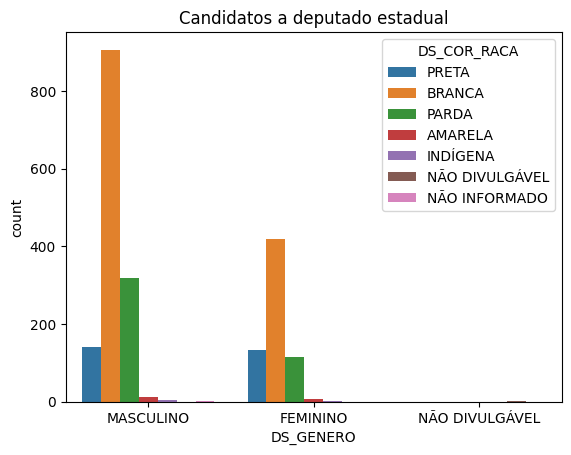

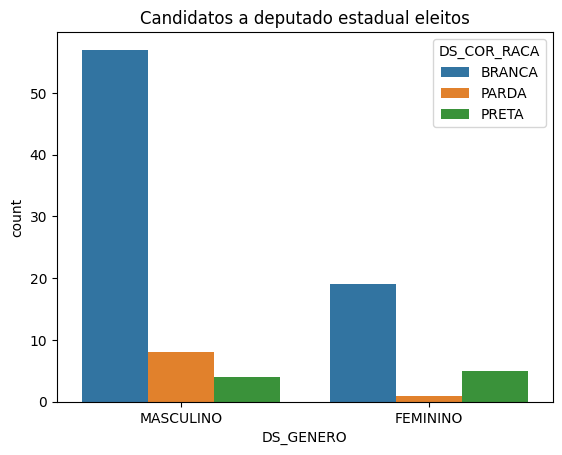

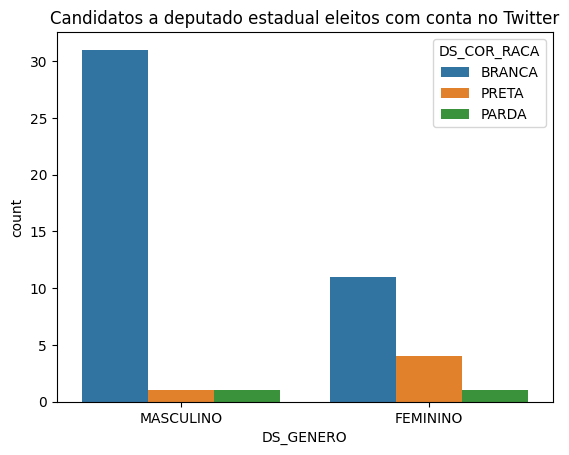

In [ ]:
# Candidatos a deputado estadual (Geral) - por gênero e raça
sns.countplot(data=candidates_df, x='DS_GENERO', hue='DS_COR_RACA')
plt.title('Candidatos a deputado estadual')
plt.show()

# Deputado estadual eleitos - por gênero e raça
sns.countplot(data=elected_df, x='DS_GENERO', hue='DS_COR_RACA')
plt.title('Candidatos a deputado estadual eleitos')
plt.show()

# Eleitos com conta no Twitter - por gênero e raça
sns.countplot(data=twitter_df, x='DS_GENERO', hue='DS_COR_RACA')
plt.title('Candidatos a deputado estadual eleitos com conta no Twitter')
plt.show()

### Visualizando a distribuição
 comparando gênero e partido

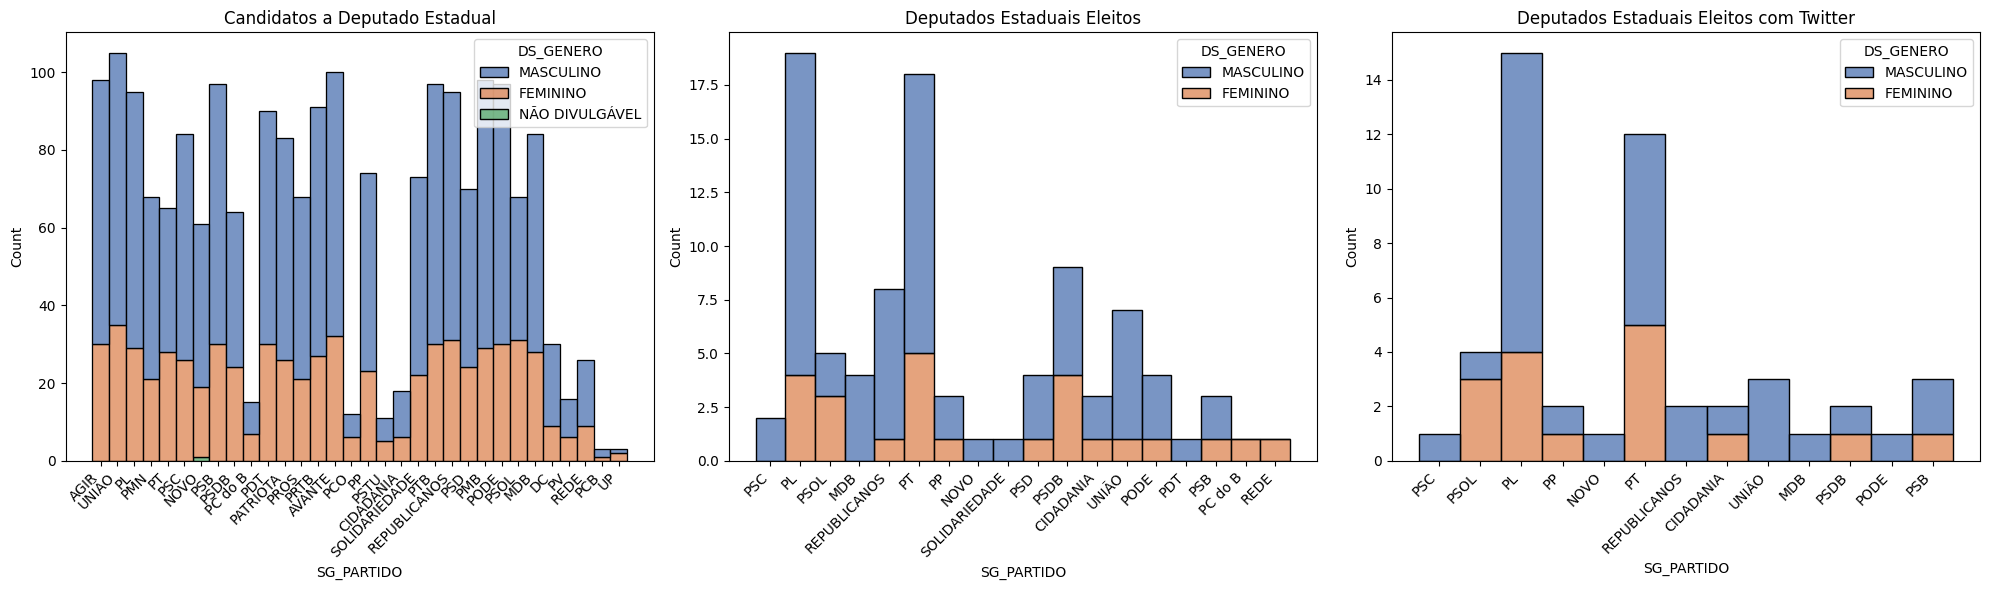

In [ ]:
# Candidatos eleitos e os eleitos com Twitter
fig, ax = plt.subplots(1, 3, figsize=(20, 6), squeeze=False)
fig.autofmt_xdate(rotation=45)

sns.histplot(
    data=candidates_df,
    hue='DS_GENERO',
    x='SG_PARTIDO',
    multiple='stack',
    ax=ax[0][0],
    palette='deep',
).set(title='Candidatos a Deputado Estadual')

sns.histplot(
    data=elected_df,
    hue='DS_GENERO',
    x='SG_PARTIDO',
    multiple='stack',
    ax=ax[0][1],
    palette='deep',
).set(title='Deputados Estaduais Eleitos')

sns.histplot(
    data=twitter_df,
    hue='DS_GENERO',
    x='SG_PARTIDO',
    multiple='stack',
    ax=ax[0][2],
    palette='deep',
).set(title='Deputados Estaduais Eleitos com Twitter')

plt.tight_layout()
plt.show()

### Visualizando a distribuição 
Por Gênero e grau de escolaridade

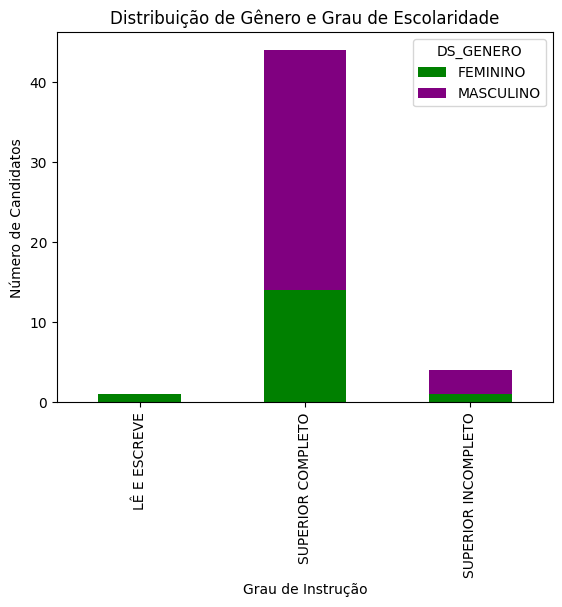

In [ ]:
grouped = twitter_df.groupby(['DS_GRAU_INSTRUCAO', 'DS_GENERO'])['SQ_CANDIDATO'].count() # Agrupa os dados por gênero e grau de instrução dos candidatos   
stacked = grouped.unstack().fillna(0) # usando o método unstack - valores ausentes são preenchidos com zero

stacked.plot(kind='bar', stacked=True, color=['Green', 'Purple'])
plt.xlabel('Grau de Instrução')
plt.title('Distribuição de Gênero e Grau de Escolaridade')
plt.ylabel('Número de Candidatos')
plt.show()

In [ ]:
#Idade máxima e mínima 

def print_age_stats(df, label): # Imprime estatísticas sobre as idades dos candidatos
    print(f"Idade máxima - {label}: {df['NR_IDADE_DATA_POSSE'].max()}")
    print(f"Idade mínima - {label}: {df['NR_IDADE_DATA_POSSE'].min()}")

print_age_stats(candidates_df, "Deputados estaduais")
print_age_stats(elected_df, "Deputados estaduais eleitos")
print_age_stats(twitter_df, "Deputados estaduais twitter")

Idade máxima - Deputados estaduais: 83.0
Idade mínima - Deputados estaduais: 21.0
Idade máxima - Deputados estaduais eleitos: 81.0
Idade mínima - Deputados estaduais eleitos: 23.0
Idade máxima - Deputados estaduais twitter: 81.0
Idade mínima - Deputados estaduais twitter: 28.0


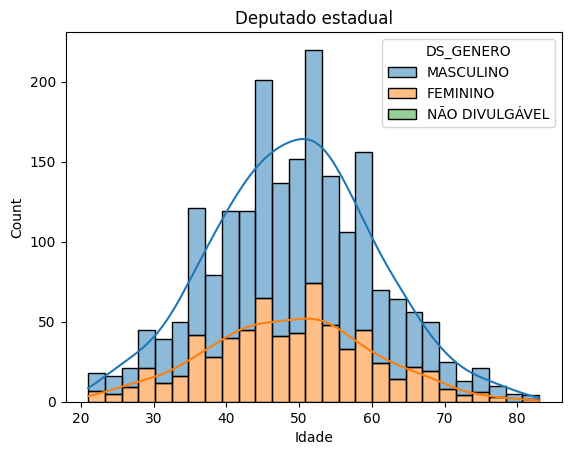

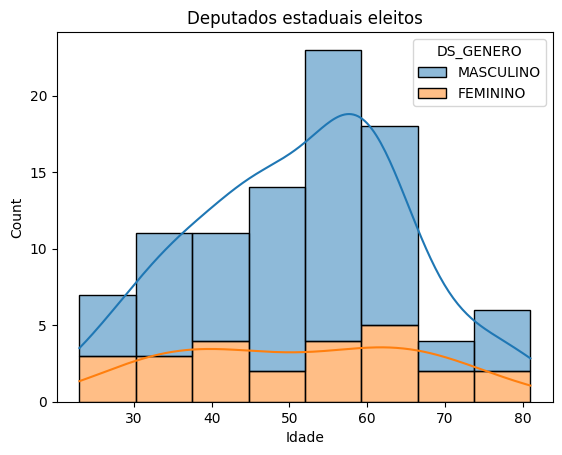

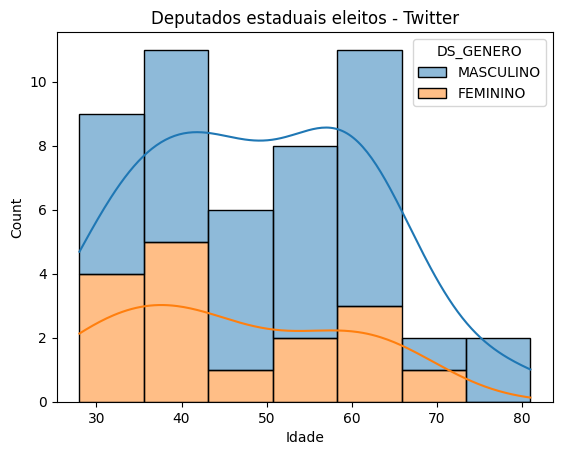

In [ ]:
# histogramas empilhando grupos, separando por idade

## kde=True adiciona a curva de densidade do kernel ao histograma
sns.histplot(data=candidates_df, x='NR_IDADE_DATA_POSSE', hue='DS_GENERO', multiple='stack', kde=True) 
plt.title('Deputado estadual')
plt.xlabel('Idade')
plt.show()

sns.histplot(data=elected_df, x='NR_IDADE_DATA_POSSE', hue='DS_GENERO', multiple='stack', kde=True)
plt.title('Deputados estaduais eleitos')
plt.xlabel('Idade')
plt.show()

sns.histplot(data=twitter_df, x='NR_IDADE_DATA_POSSE', hue='DS_GENERO', multiple='stack', kde=True)
plt.title('Deputados estaduais eleitos - Twitter')
plt.xlabel('Idade')
plt.show()

# Dados das Contas do Twitter

In [ ]:
# Lista das contas no twitter dos deputados estaduais eleitos
twitter_df.DS_URL

22                          https://www.twitter/dreltonjr
232              https://twitter.com/EdianeMariaMTST?s=09
276     https://twitter.com/fabibbolsonaro?s=21&t=yq90...
318                      https://twitter.com/delegadoolim
367     https://www.twitter.com/https://twitter.com/le...
391     https://twitter.com/bethsahao?ref_src=twsrc%5E...
427                          https://twitter.com/sppretas
458                    https://www.twitter.com/tomeabduch
459                     https://twitter.com/prcarloscezar
490                        https://twitter.com/majormecca
514                      https://twitter.com/valbolsonaro
560                      https://twitter.com/zimbaldirafa
599                    https://twitter.com/CarlosGiannazi
660              https://twitter.com/tenente_coimbra?s=11
690                   https://twitter.com/rafaelsaraivasp
741                    https://twitter.com/BrunoZambelli3
742                      https://twitter.com/LFTeixeira13
810           

In [ ]:
def get_twitter_username(link):
    if link.startswith("https://twitter.com/"):
        link = link.rstrip('/')
        username = link.split('/')[-1]
        username = username.split('?')[0]
        return username.lower()
    elif link.startswith("https://www.twitter/"):
        link = link.rstrip('/')
        username = link.split('/')[-1]
        return username.lower()
    else:
        return None

twitter_df['TW_USER'] = twitter_df.DS_URL.apply(get_twitter_username)
twitter_df['TW_USER'].describe()
      

count            42
unique           42
top       dreltonjr
freq              1
Name: TW_USER, dtype: object

In [ ]:
# Vamos raspar os dados numéricos de cada uma das contas do Twitter
usernames = list(twitter_df['TW_USER'])

user_data = {}
for i, username in enumerate(usernames):
    try:
        last_tweet = next(sntwitter.TwitterProfileScraper(username).get_items())
        user_data[username] = {
            'followersCount': last_tweet.user.followersCount,
            'friendsCount': last_tweet.user.friendsCount,
            'statusesCount': last_tweet.user.statusesCount,
            'favouritesCount': last_tweet.user.favouritesCount,
            'listedCount': last_tweet.user.listedCount,
            'mediaCount': last_tweet.user.mediaCount,
        }
        print(f'{i+1}/{len(usernames)} {username}: {user_data[username]}')
    except Exception as e:
        print(f'{i+1}/{len(usernames)} {username}: Erro {e}')
        user_data[username] = {
            'followersCount': 0,
            'friendsCount': 0,
            'statusesCount': 0,
            'favouritesCount': 0,
            'listedCount': 0,
            'mediaCount': 0,
        }

1/49 dreltonjr: {'followersCount': 872, 'friendsCount': 462, 'statusesCount': 743, 'favouritesCount': 301, 'listedCount': 1, 'mediaCount': 480}
2/49 edianemariamtst: {'followersCount': 14556, 'friendsCount': 255, 'statusesCount': 3622, 'favouritesCount': 3153, 'listedCount': 40, 'mediaCount': 590}
3/49 fabibbolsonaro: {'followersCount': 15476, 'friendsCount': 7080, 'statusesCount': 99, 'favouritesCount': 500, 'listedCount': 3, 'mediaCount': 40}
4/49 delegadoolim: {'followersCount': 2970, 'friendsCount': 0, 'statusesCount': 1924, 'favouritesCount': 233, 'listedCount': 37, 'mediaCount': 465}
5/49 None: Erro object of type 'NoneType' has no len()
6/49 bethsahao: {'followersCount': 2748, 'friendsCount': 1576, 'statusesCount': 9676, 'favouritesCount': 3870, 'listedCount': 71, 'mediaCount': 545}
7/49 sppretas: {'followersCount': 1794, 'friendsCount': 18, 'statusesCount': 283, 'favouritesCount': 712, 'listedCount': 10, 'mediaCount': 38}
8/49 None: Erro object of type 'NoneType' has no len()
9

16/49 brunozambelli3: {'followersCount': 3824, 'friendsCount': 81, 'statusesCount': 343, 'favouritesCount': 715, 'listedCount': 7, 'mediaCount': 137}
17/49 lfteixeira13: Erro Could not resolve username 'lfteixeira13' to ID
18/49 emidiodesouza_: {'followersCount': 10353, 'friendsCount': 1095, 'statusesCount': 20135, 'favouritesCount': 5148, 'listedCount': 168, 'mediaCount': 2940}
19/49 esuplicy: {'followersCount': 723735, 'friendsCount': 3704, 'statusesCount': 14893, 'favouritesCount': 6640, 'listedCount': 2205, 'mediaCount': 5526}
20/49 depeniotatto: {'followersCount': 526, 'friendsCount': 72, 'statusesCount': 1220, 'favouritesCount': 6, 'listedCount': 18, 'mediaCount': 145}
21/49 anacarolserra23: {'followersCount': 193, 'friendsCount': 194, 'statusesCount': 38, 'favouritesCount': 1212, 'listedCount': 4, 'mediaCount': 17}
22/49 xerifedoconsum: {'followersCount': 1414, 'friendsCount': 4, 'statusesCount': 667, 'favouritesCount': 0, 'listedCount': 11, 'mediaCount': 175}
23/49 None: Erro o

### Adicionando os dados dos usuários 

In [ ]:

# Quantidade de seguidores da conta
twitter_df['TW_followersCount'] = twitter_df.TW_USER.apply(lambda x: user_data[x]['followersCount'])

# Quantidade de usuarios que a conta segue
twitter_df['TW_friendsCount'] = twitter_df.TW_USER.apply(lambda x: user_data[x]['friendsCount'])

# Quantidade de tweets postados pela conta
twitter_df['TW_statusesCount'] = twitter_df.TW_USER.apply(lambda x: user_data[x]['statusesCount'])

# Quantidade de tweets curtidos pela conta
twitter_df['TW_favouritesCount'] = twitter_df.TW_USER.apply(lambda x: user_data[x]['favouritesCount'])

twitter_df['TW_listedCount'] = twitter_df.TW_USER.apply(lambda x: user_data[x]['listedCount'])
twitter_df['TW_mediaCount'] = twitter_df.TW_USER.apply(lambda x: user_data[x]['mediaCount'])

print(twitter_df.shape)


(49, 55)


In [ ]:
# Alterando o nome de algumas colunas (com dados do Twitter)
new_column_names = {
    'TW_followersCount': 'NR_SEGUIDORES',
    'TW_friendsCount': 'NR_CTS SEGUIDAS',
    'TW_statusesCount': 'NR_TTS POSTADOS',
    'TW_favouritesCount': 'NR_TTS CURTIDOS',
    'TW_listedCount': 'NR_CONTA ADD LISTA',
    'TW_mediaCount': 'NR.MIDIAS POSTADAS'
}

twitter_df.rename(columns=new_column_names, inplace=True)

print(twitter_df.columns)

Index(['DT_GERACAO', 'HH_GERACAO', 'CD_TIPO_ELEICAO', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'DS_SITUACAO_CANDIDATURA',
       'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'NR_FEDERACAO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO',
       'CD_MUNICIPIO_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_IDADE_DATA_POSSE', 'CD_GENERO', 'DS_GENERO', 'CD_GRAU_INSTRUCAO',
       'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL',
       'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO', 'DS_OCUPACAO',
       'VR_DESPESA_MAX_CAMPANHA', 'DS_SIT_TOT_TURNO', 'ST_REELEICAO',
       'ST_DECLARAR_BENS', 'CD_SITUACAO_CANDIDATO_PLEITO',
       'DS_SITUACAO_CANDIDATO_PLEITO', 'CD_SITUACAO_CANDIDATO_URNA',
       'DS_SITUACAO_CANDIDATO_URNA', 'ST_CANDIDATO_INSERIDO_URNA',
       'NM_TIPO_DESTINACAO_VOTOS', 'CD_SI

In [ ]:
twitter_df.head(2)

,DT_GERACAO,HH_GERACAO,CD_TIPO_ELEICAO,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,NR_FEDERACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS,DS_URL,TW_USER,NR_SEGUIDORES,NR_CTS SEGUIDAS,NR_TTS POSTADOS,NR_TTS CURTIDOS,NR_CONTA ADD LISTA,NR.MIDIAS POSTADAS
22,15/02/2023,18:42:41,2,7,DEPUTADO ESTADUAL,250001643810,ELTON ALVES RIBEIRO DE CARVALHO JUNIOR,DR. ELTON,#NULO#,APTO,DEFERIDO,PARTIDO ISOLADO,20,PSC,PARTIDO SOCIAL CRISTÃO,-1,PSC,1,BRASILEIRA NATA,SP,-3,SÃO JOSÉ DOS CAMPOS,08/07/1974,48.00,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,111,MÉDICO,"1,270,629.01",ELEITO POR QP,N,S,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,https://www.twitter/dreltonjr,dreltonjr,872,462,743,301,1,480
232,15/02/2023,18:42:41,2,7,DEPUTADO ESTADUAL,250001619350,EDIANE MARIA DO NASCIMENTO,EDIANE MARIA,#NULO#,APTO,DEFERIDO,FEDERAÇÃO,50,PSOL,PARTIDO SOCIALISMO E LIBERDADE,3,PSOL/REDE,1,BRASILEIRA NATA,PE,-3,FLORESTA,10/10/1983,39.00,4,FEMININO,2,LÊ E ESCREVE,1,SOLTEIRO(A),2,PRETA,598,EMPREGADO DOMÉSTICO,"1,270,629.01",ELEITO POR QP,N,S,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,https://twitter.com/EdianeMariaMTST?s=09,edianemariamtst,14556,255,3622,3153,40,590


In [ ]:
twitter_df.groupby([
    'TW_USER', 'SG_PARTIDO', 'DS_GENERO'])[['NR_SEGUIDORES', 'NR_CTS SEGUIDAS', 
    'NR_TTS POSTADOS', 'NR_TTS CURTIDOS']].sum().sort_values(by=['TW_USER', 'SG_PARTIDO', 'DS_GENERO'])

,,,NR_SEGUIDORES,NR_CTS SEGUIDAS,NR_TTS POSTADOS,NR_TTS CURTIDOS
TW_USER,SG_PARTIDO,DS_GENERO,,,,
anacarolserra23,CIDADANIA,FEMININO,193,194,38,1212
anaperugini,PT,FEMININO,5033,1040,10379,6920
bethsahao,PT,FEMININO,2748,1576,9676,3870
bfeministapsol,PSOL,FEMININO,7987,251,4233,1961
brunozambelli3,PL,MASCULINO,3824,81,343,715
caiofranca40,PSB,MASCULINO,5797,1151,4928,3442
carlosgiannazi,PSOL,MASCULINO,21248,827,14247,14521
carteiroreaca,PL,MASCULINO,529053,857,16316,15228
contelopes,PL,MASCULINO,10477,31,3033,70


In [ ]:
#Maior número de seguidores
max_followers = twitter_df['NR_SEGUIDORES'].max()
max_followers_user = twitter_df.loc[twitter_df['NR_SEGUIDORES'].idxmax(), 'TW_USER']
print("Usuário com mais seguidores:", max_followers_user)
print("Número de seguidores:", max_followers)

Usuário com mais seguidores: esuplicy
Número de seguidores: 723735


In [193]:
#Menor número de seguidores
min_followers = twitter_df['NR_SEGUIDORES'].min()
min_followers_user = twitter_df.loc[twitter_df['NR_SEGUIDORES'].idxmin(), 'TW_USER']
print("Usuário com menos seguidores:", min_followers_user)
print("Número de seguidores:", min_followers)

Usuário com menos seguidores: None
Número de seguidores: 0


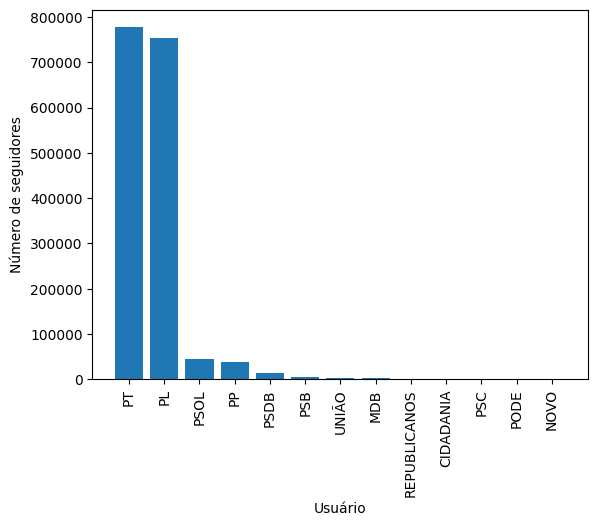

In [191]:
# Agrupa os dados por usuário e soma o número de seguidores
followers_df = twitter_df.groupby('SG_PARTIDO')['NR_SEGUIDORES'].sum()

followers_df = followers_df.sort_values(ascending=False)

plt.bar(followers_df.index, followers_df.values)

plt.xlabel('Usuário')
plt.ylabel('Número de seguidores')
plt.xticks(rotation=90)
plt.show()

